In [1]:
#Importing all coding libraries
import pandas as pd
import numpy as np
import plotly.express as px
from scipy import stats
import scipy.stats as stats
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

##### Datasets

In [2]:
#cs == calorie supply
cs = pd.read_csv("daily-per-capita-supply-of-calories-vs-gdp-per-capita.csv")

In [3]:
cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57753 entries, 0 to 57752
Data columns (total 7 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            57753 non-null  object 
 1   Code                                                              54423 non-null  object 
 2   Year                                                              57753 non-null  int64  
 3   Daily caloric supply (OWID based on UN FAO & historical sources)  10112 non-null  float64
 4   GDP per capita, PPP (constant 2017 international $)               6166 non-null   float64
 5   Population (historical estimates)                                 57172 non-null  float64
 6   Continent                                                         285 non-null    object 
dtypes: float64(3), int64(1), object(

In [4]:
#gf == global food
gf = pd.read_csv("global-food.csv")

##### Exploring and Understanding Data

In [5]:
gf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12280 entries, 0 to 12279
Data columns (total 40 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Product                                      0 non-null      float64
 1   Country                                      12280 non-null  object 
 2   Year                                         12280 non-null  int64  
 3   Population                                   12280 non-null  int64  
 4   Production (t)                               0 non-null      float64
 5   production__tonnes__per_capita               0 non-null      float64
 6   Production per capita (kg)                   0 non-null      float64
 7   Yield (t/ha)                                 0 non-null      float64
 8   Yield (kg/animal)                            0 non-null      float64
 9   Land Use (ha)                                0 non-null      float64
 10

In [6]:
#Checking first few rows in calory supply dataset
cs.head()

,Entity,Code,Year,Daily caloric supply (OWID based on UN FAO & historical sources),"GDP per capita, PPP (constant 2017 international $)",Population (historical estimates),Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,1961,2999.0,NaN,8790140.0,NaN
2,Afghanistan,AFG,1962,2917.0,NaN,8969055.0,NaN
3,Afghanistan,AFG,1963,2698.0,NaN,9157463.0,NaN
4,Afghanistan,AFG,1964,2953.0,NaN,9355510.0,NaN


In [7]:
#Checking first few rows in global food dataset
gf.head()

,Product,Country,Year,Population,Production (t),production__tonnes__per_capita,Production per capita (kg),Yield (t/ha),Yield (kg/animal),Land Use (ha),...,other_uses__tonnes__per_capita,Other uses per capita (kg),Supply chain waste (t),waste_in_supply_chain__tonnes__per_capita,Supply chain waste per capita (kg),Food supply (kg per capita per year),Food supply (g per capita per day),Food supply (kcal per capita per day),Food supply (Protein g per capita per day),Food supply (Fat g per capita per day)
0,NaN,Afghanistan,1961,8790140,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3054.9053,86.492840,38.209236
1,NaN,Afghanistan,1962,8969055,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2973.2468,84.580055,38.335213
2,NaN,Afghanistan,1963,9157463,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2751.7795,78.657250,39.338820
3,NaN,Afghanistan,1964,9355510,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3013.4424,85.198880,39.747234
4,NaN,Afghanistan,1965,9565154,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3017.7600,85.612100,40.560085


In [8]:
 #Checking what is in the Year column of cs dataset
cs["Year"].unique()

array([  2015,   1961,   1962,   1963,   1964,   1965,   1966,   1967,
         1968,   1969,   1970,   1971,   1972,   1973,   1974,   1975,
         1976,   1977,   1978,   1979,   1980,   1981,   1982,   1983,
         1984,   1985,   1986,   1987,   1988,   1989,   1990,   1991,
         1992,   1993,   1994,   1995,   1996,   1997,   1998,   1999,
         2000,   2001,   2002,   2003,   2004,   2005,   2006,   2007,
         2008,   2009,   2010,   2011,   2012,   2013,   2014,   2016,
         2017,   2018,   2019,   2020, -10000,  -9000,  -8000,  -7000,
        -6000,  -5000,  -4000,  -3000,  -2000,  -1000,      0,    100,
          200,    300,    400,    500,    600,    700,    800,    900,
         1000,   1100,   1200,   1300,   1400,   1500,   1600,   1700,
         1710,   1720,   1730,   1740,   1750,   1760,   1770,   1780,
         1790,   1800,   1801,   1802,   1803,   1804,   1805,   1806,
         1807,   1808,   1809,   1810,   1811,   1812,   1813,   1814,
      

In [9]:
#dropping nna, naN an unnecessary values in cs dataset
cs = cs.dropna()

In [10]:
#Checking what is in the Year column of cs dataset
cs.head()

,Entity,Code,Year,Daily caloric supply (OWID based on UN FAO & historical sources),"GDP per capita, PPP (constant 2017 international $)",Population (historical estimates),Continent
55,Afghanistan,AFG,2015,2044.0,2068.265869,33753500.0,Asia
574,Albania,ALB,2015,3280.0,11878.454102,2882482.0,Europe
835,Algeria,DZA,2015,3379.0,11696.950195,39543148.0,Africa
1465,Angola,AGO,2015,2380.0,8036.411133,28127724.0,Africa
1849,Antigua and Barbuda,ATG,2015,2405.0,18594.544922,89958.0,North America


In [11]:
#Checking the description of data in our dataframe
cs.describe()

,Year,Daily caloric supply (OWID based on UN FAO & historical sources),"GDP per capita, PPP (constant 2017 international $)",Population (historical estimates)
count,165.0,165.000000,165.000000,1.650000e+02
mean,2015.0,2858.266667,19515.389968,4.320007e+07
std,0.0,445.912987,20055.720770,1.538070e+08
min,2015.0,1729.000000,852.749207,4.781400e+04
25%,2015.0,2520.000000,4785.994629,2.878598e+06
50%,2015.0,2832.000000,12569.064453,9.494250e+06
75%,2015.0,3222.000000,27797.058594,3.094942e+07
max,2015.0,3804.000000,119406.921875,1.393715e+09


In [12]:
#Checkinh who many rows and columns we have in our dataset
cs.shape

(165, 7)

In [13]:
#Checking what Years we have in our Year column
cs["Year"].unique()

array([2015])

In [14]:
#Renaming columns in cs dataset
cs.rename(columns = {'Entity':'Country',
                     'Code':'Code',
                     'Year': 'Year',
                     'Daily caloric supply (OWID based on UN FAO & historical sources)':'DailyCalory',
                     'GDP per capita, PPP (constant 2017 international $)':'GDP',
                     'Population (historical estimates)':'Population',
                     'Continent':'Continent',
                    },
          inplace = True)   

In [15]:
#Checking all columns we have in gf dataset
gf.columns

Index(['Product', 'Country', 'Year', 'Population', 'Production (t)',
       'production__tonnes__per_capita', 'Production per capita (kg)',
       'Yield (t/ha)', 'Yield (kg/animal)', 'Land Use (ha)',
       'area_harvested__ha__per_capita', 'Land Use per capita (m²)',
       'Producing or slaughtered animals',
       'Producing or slaughtered animals per capita', 'Imports (t)',
       'imports__tonnes__per_capita', 'Imports per capita (kg)', 'Exports (t)',
       'exports__tonnes__per_capita', 'Exports per capita (kg)',
       'Domestic supply (t)', 'domestic_supply__tonnes__per_capita',
       'Domestic supply per capita (kg)', 'Food (t)',
       'food__tonnes__per_capita', 'Food per capita (kg)', 'Animal feed (t)',
       'feed__tonnes__per_capita', 'Animal feed per capita (kg)',
       'Other uses (t)', 'other_uses__tonnes__per_capita',
       'Other uses per capita (kg)', 'Supply chain waste (t)',
       'waste_in_supply_chain__tonnes__per_capita',
       'Supply chain waste per c

In [16]:
#Checking first few rows of gf dataset
gf.head()

,Product,Country,Year,Population,Production (t),production__tonnes__per_capita,Production per capita (kg),Yield (t/ha),Yield (kg/animal),Land Use (ha),...,other_uses__tonnes__per_capita,Other uses per capita (kg),Supply chain waste (t),waste_in_supply_chain__tonnes__per_capita,Supply chain waste per capita (kg),Food supply (kg per capita per year),Food supply (g per capita per day),Food supply (kcal per capita per day),Food supply (Protein g per capita per day),Food supply (Fat g per capita per day)
0,NaN,Afghanistan,1961,8790140,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3054.9053,86.492840,38.209236
1,NaN,Afghanistan,1962,8969055,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2973.2468,84.580055,38.335213
2,NaN,Afghanistan,1963,9157463,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2751.7795,78.657250,39.338820
3,NaN,Afghanistan,1964,9355510,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3013.4424,85.198880,39.747234
4,NaN,Afghanistan,1965,9565154,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3017.7600,85.612100,40.560085


In [17]:
gf.drop(["Product", "Production (t)",
       "production__tonnes__per_capita", "Production per capita (kg)",
       "Yield (t/ha)", "Yield (kg/animal)", "Land Use (ha)",
       "area_harvested__ha__per_capita", "Land Use per capita (m²)",
       "Producing or slaughtered animals",
       "Producing or slaughtered animals per capita", "Imports (t)",
       "imports__tonnes__per_capita", "Imports per capita (kg)", "Exports (t)",
       "exports__tonnes__per_capita", "Exports per capita (kg)",
       "Domestic supply (t)", "domestic_supply__tonnes__per_capita",
       "Domestic supply per capita (kg)", "Food (t)",
       "food__tonnes__per_capita", "Food per capita (kg)", "Animal feed (t)",
       "feed__tonnes__per_capita", "Animal feed per capita (kg)",
       "Other uses (t)", "other_uses__tonnes__per_capita",
       "Other uses per capita (kg)", "Supply chain waste (t)",
       "waste_in_supply_chain__tonnes__per_capita",
       "Supply chain waste per capita (kg)",
       "Food supply (kg per capita per year)",
       "Food supply (g per capita per day)",
         "Food supply (kcal per capita per day)",
        "Food supply (Protein g per capita per day)",
        "Food supply (Fat g per capita per day)"],
        axis=1, inplace=True)

In [18]:
#Dropping nan, naN and unnecessary values in gf dataset
gf.dropna()

,Country,Year,Population
0,Afghanistan,1961,8790140
1,Afghanistan,1962,8969055
2,Afghanistan,1963,9157463
3,Afghanistan,1964,9355510
4,Afghanistan,1965,9565154
...,...,...,...
12275,Zimbabwe,2015,14154937
12276,Zimbabwe,2016,14452705
12277,Zimbabwe,2017,14751101
12278,Zimbabwe,2018,15052191


In [19]:
#Checking first few rows of gf dataset after droping unnecessary values
gf.head()

,Country,Year,Population
0,Afghanistan,1961,8790140
1,Afghanistan,1962,8969055
2,Afghanistan,1963,9157463
3,Afghanistan,1964,9355510
4,Afghanistan,1965,9565154


In [20]:
#Describing gf dataset
gf.describe()

,Year,Population
count,12280.000000,1.228000e+04
mean,1990.868974,1.772674e+08
std,17.070818,5.819415e+08
min,1961.000000,3.400000e+04
25%,1976.000000,2.533940e+06
50%,1992.000000,1.050663e+07
75%,2006.000000,5.706852e+07
max,2019.000000,7.764951e+09


In [21]:
#Checking first few rows of cs dataset
cs.head()

,Country,Code,Year,DailyCalory,GDP,Population,Continent
55,Afghanistan,AFG,2015,2044.0,2068.265869,33753500.0,Asia
574,Albania,ALB,2015,3280.0,11878.454102,2882482.0,Europe
835,Algeria,DZA,2015,3379.0,11696.950195,39543148.0,Africa
1465,Angola,AGO,2015,2380.0,8036.411133,28127724.0,Africa
1849,Antigua and Barbuda,ATG,2015,2405.0,18594.544922,89958.0,North America


##### Merging and comparing data features 

In [59]:
#Merging two datasets gf and cs
data = pd.merge(gf, cs, on=["Country", "Year", "Population"], how="left" ) 

In [60]:
#Checking first few rows of emerged dataset
data.head()

,Country,Year,Population,Code,DailyCalory,GDP,Continent
0,Afghanistan,1961,8790140,NaN,NaN,NaN,NaN
1,Afghanistan,1962,8969055,NaN,NaN,NaN,NaN
2,Afghanistan,1963,9157463,NaN,NaN,NaN,NaN
3,Afghanistan,1964,9355510,NaN,NaN,NaN,NaN
4,Afghanistan,1965,9565154,NaN,NaN,NaN,NaN


In [61]:
#Selecting all columns and arranging them by selected position
data.loc[:, ["Country", "Code", "Continent", "Year", "Population", "DailyCalory", "GDP"]]

,Country,Code,Continent,Year,Population,DailyCalory,GDP
0,Afghanistan,NaN,NaN,1961,8790140,NaN,NaN
1,Afghanistan,NaN,NaN,1962,8969055,NaN,NaN
2,Afghanistan,NaN,NaN,1963,9157463,NaN,NaN
3,Afghanistan,NaN,NaN,1964,9355510,NaN,NaN
4,Afghanistan,NaN,NaN,1965,9565154,NaN,NaN
...,...,...,...,...,...,...,...
12275,Zimbabwe,ZWE,Africa,2015,14154937,1912.0,3707.622559
12276,Zimbabwe,NaN,NaN,2016,14452705,NaN,NaN
12277,Zimbabwe,NaN,NaN,2017,14751101,NaN,NaN
12278,Zimbabwe,NaN,NaN,2018,15052191,NaN,NaN


In [62]:
#Dropping all rows with NaN data
data.dropna(inplace=True) 

In [63]:
#Checking first few columns in newly formed dataset
data.head()

,Country,Year,Population,Code,DailyCalory,GDP,Continent
54,Afghanistan,2015,33753500,AFG,2044.0,2068.265869,Asia
231,Albania,2015,2882482,ALB,3280.0,11878.454102,Europe
290,Algeria,2015,39543148,DZA,3379.0,11696.950195,Africa
408,Angola,2015,28127724,AGO,2380.0,8036.411133,Africa
467,Antigua and Barbuda,2015,89958,ATG,2405.0,18594.544922,North America


In [64]:
#Checking columns and rows number in our dataset
data.shape

(148, 7)

In [65]:
#Describing data
data.describe()

,Year,Population,DailyCalory,GDP
count,148.0,1.480000e+02,148.000000,148.000000
mean,2015.0,1.655570e+07,2826.412162,19274.031900
std,0.0,2.527440e+07,439.657085,20390.829317
min,2015.0,4.781400e+04,1729.000000,852.749207
25%,2015.0,2.219486e+06,2508.750000,4331.738281
50%,2015.0,7.436538e+06,2780.500000,11934.864258
75%,2015.0,1.901504e+07,3183.000000,27912.890625
max,2015.0,1.578300e+08,3804.000000,119406.921875


In [66]:
# summary of the dataset: 148 rows, 7 columns, no null values
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148 entries, 54 to 12275
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      148 non-null    object 
 1   Year         148 non-null    int64  
 2   Population   148 non-null    int64  
 3   Code         148 non-null    object 
 4   DailyCalory  148 non-null    float64
 5   GDP          148 non-null    float64
 6   Continent    148 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 9.2+ KB
None


In [67]:
data['DailyCalory'] = data['DailyCalory'].apply(np.int64)
data['GDP'] = data['GDP'].apply(np.int64)

In [68]:
#A summary for first few rows of our data
data.head()

,Country,Year,Population,Code,DailyCalory,GDP,Continent
54,Afghanistan,2015,33753500,AFG,2044,2068,Asia
231,Albania,2015,2882482,ALB,3280,11878,Europe
290,Algeria,2015,39543148,DZA,3379,11696,Africa
408,Angola,2015,28127724,AGO,2380,8036,Africa
467,Antigua and Barbuda,2015,89958,ATG,2405,18594,North America


In [69]:
#Amount of daily calory across our data 
data['DailyCalory'].astype('category').value_counts()

2520    2
2709    2
2716    2
2985    2
3342    2
       ..
2563    1
2544    1
2532    1
2530    1
3804    1
Name: DailyCalory, Length: 141, dtype: int64

In [70]:
#Population across our data 
data['Population'].astype('category').value_counts()

47814        1
11090090     1
11557779     1
11626003     1
11642963     1
            ..
3908745      1
3946225      1
3957102      1
4191784      1
157830000    1
Name: Population, Length: 148, dtype: int64

In [71]:
#GDP spread across countries in our data 
data['GDP'].astype('category').value_counts()

852       1
18362     1
19141     1
19268     1
19317     1
         ..
6438      1
6543      1
7126      1
7300      1
119406    1
Name: GDP, Length: 148, dtype: int64

In [72]:
#Setting index to country
data.set_index('Country', inplace = True)

##### Comparing Features and countries (Ireland vs other countries)

*******Sentimental Analysis

In [73]:
from sklearn.model_selection import train_test_split

data_train, data_test = train_test_split(data, test_size=0.1)

In [74]:
## dimension of the dataset

print("Size of train dataset: ", data.shape)
print("Size of test dataset: ", data.shape)

Size of train dataset:  (148, 6)
Size of test dataset:  (148, 6)


In [75]:
#printing last rows of train dataset
data.tail()

#printing head rows of test dataset
data.head()

,Year,Population,Code,DailyCalory,GDP,Continent
Country,,,,,,
Afghanistan,2015,33753500,AFG,2044,2068,Asia
Albania,2015,2882482,ALB,3280,11878,Europe
Algeria,2015,39543148,DZA,3379,11696,Africa
Angola,2015,28127724,AGO,2380,8036,Africa
Antigua and Barbuda,2015,89958,ATG,2405,18594,North America


##### Ireland Vs Other Countries in Europe

In [76]:
#Printing Ireland data
print(data.loc['Ireland'])

Year              2015
Population     4665764
Code               IRL
DailyCalory       3717
GDP              71508
Continent       Europe
Name: Ireland, dtype: object


In [77]:
#Checking all countries in Europe
data[data['Continent'] == 'Europe']

,Year,Population,Code,DailyCalory,GDP,Continent
Country,,,,,,
Albania,2015,2882482,ALB,3280,11878,Europe
Austria,2015,8642422,AUT,3664,52873,Europe
Belarus,2015,9700609,BLR,3186,18362,Europe
Belgium,2015,11248306,BEL,3804,49456,Europe
Bosnia and Herzegovina,2015,3524328,BIH,3268,12630,Europe
Bulgaria,2015,7309255,BGR,2753,19988,Europe
Croatia,2015,4254821,HRV,3047,24884,Europe
Cyprus,2015,1187286,CYP,3051,34453,Europe
Czechia,2015,10523801,CZE,3122,36168,Europe


In [78]:
#Picking random six European countries at random

print(data.loc['Poland'])
print(data.loc['Sweden'])
print(data.loc['Cyprus'])
print(data.loc['Belgium'])
print(data.loc['Ireland'])
print(data.loc['Luxembourg'])

Year               2015
Population     38553148
Code                POL
DailyCalory        3373
GDP               27797
Continent        Europe
Name: Poland, dtype: object
Year              2015
Population     9849344
Code               SWE
DailyCalory       3182
GDP              50928
Continent       Europe
Name: Sweden, dtype: object
Year              2015
Population     1187286
Code               CYP
DailyCalory       3051
GDP              34453
Continent       Europe
Name: Cyprus, dtype: object
Year               2015
Population     11248306
Code                BEL
DailyCalory        3804
GDP               49456
Continent        Europe
Name: Belgium, dtype: object
Year              2015
Population     4665764
Code               IRL
DailyCalory       3717
GDP              71508
Continent       Europe
Name: Ireland, dtype: object
Year             2015
Population     569415
Code              LUX
DailyCalory      3467
GDP            113182
Continent      Europe
Name: Luxembourg, dtype:

In [79]:
#Countries with higher GDP than Ireland in the world
data.loc[data['GDP'] >= 71508]

,Year,Population,Code,DailyCalory,GDP,Continent
Country,,,,,,
Ireland,2015,4665764,IRL,3717,71508,Europe
Luxembourg,2015,569415,LUX,3467,113182,Europe
Macao,2015,615243,MAC,3295,119406,Asia


In [80]:
#Countries with higher Daily Calory than Ireland in the world
data.loc[data['DailyCalory'] >= 3717]

,Year,Population,Code,DailyCalory,GDP,Continent
Country,,,,,,
Belgium,2015,11248306,BEL,3804,49456,Europe
Ireland,2015,4665764,IRL,3717,71508,Europe


In [81]:
#Printing random data all countries from Hungary to Japan in alphabetical order.
print(data.loc['Hungary':'Japan'])

         Year  Population Code  DailyCalory    GDP      Continent
Country                                                          
Hungary  2015     9844250  HUN         3222  27531         Europe
Iceland  2015      331068  ISL         3557  52142         Europe
Iraq     2015    37757812  IRQ         2532   9946           Asia
Ireland  2015     4665764  IRL         3717  71508         Europe
Israel   2015     8007777  ISR         3511  37306           Asia
Italy    2015    60232908  ITA         3483  40247         Europe
Jamaica  2015     2794455  JAM         2743   9473  North America
Japan    2015   127250936  JPN         2701  40402           Asia


In [82]:
#Changing Daily Calory column tfrom object to numbers
data['DailyCalory'] = data['DailyCalory'].astype(int)

In [83]:
#Checking data information
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148 entries, Afghanistan to Zimbabwe
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Year         148 non-null    int64 
 1   Population   148 non-null    int64 
 2   Code         148 non-null    object
 3   DailyCalory  148 non-null    int64 
 4   GDP          148 non-null    int64 
 5   Continent    148 non-null    object
dtypes: int64(4), object(2)
memory usage: 12.2+ KB


In [84]:
#Printing Ireland row by displaying its information
print(data.loc["Ireland"])

Year              2015
Population     4665764
Code               IRL
DailyCalory       3717
GDP              71508
Continent       Europe
Name: Ireland, dtype: object


In [85]:
#Countries with GDP less than that od Ireland
data.loc[data['GDP'] < 71508.734375]

,Year,Population,Code,DailyCalory,GDP,Continent
Country,,,,,,
Afghanistan,2015,33753500,AFG,2044,2068,Asia
Albania,2015,2882482,ALB,3280,11878,Europe
Algeria,2015,39543148,DZA,3379,11696,Africa
Angola,2015,28127724,AGO,2380,8036,Africa
Antigua and Barbuda,2015,89958,ATG,2405,18594,North America
...,...,...,...,...,...,...
Uzbekistan,2015,30949416,UZB,2985,6401,Asia
Vanuatu,2015,276450,VUT,2699,2915,Oceania
Vietnam,2015,92191400,VNM,2900,6438,Asia


In [86]:
#Countries with DailyCalory less than Ireland
data.loc[data['DailyCalory'] < 71508.734375]

,Year,Population,Code,DailyCalory,GDP,Continent
Country,,,,,,
Afghanistan,2015,33753500,AFG,2044,2068,Asia
Albania,2015,2882482,ALB,3280,11878,Europe
Algeria,2015,39543148,DZA,3379,11696,Africa
Angola,2015,28127724,AGO,2380,8036,Africa
Antigua and Barbuda,2015,89958,ATG,2405,18594,North America
...,...,...,...,...,...,...
Uzbekistan,2015,30949416,UZB,2985,6401,Asia
Vanuatu,2015,276450,VUT,2699,2915,Oceania
Vietnam,2015,92191400,VNM,2900,6438,Asia


In [87]:
#Reseting dataset
data = data.reset_index()

In [88]:
#Checking first few columns
data.head()

,Country,Year,Population,Code,DailyCalory,GDP,Continent
0,Afghanistan,2015,33753500,AFG,2044,2068,Asia
1,Albania,2015,2882482,ALB,3280,11878,Europe
2,Algeria,2015,39543148,DZA,3379,11696,Africa
3,Angola,2015,28127724,AGO,2380,8036,Africa
4,Antigua and Barbuda,2015,89958,ATG,2405,18594,North America


### Data Visualization

In [89]:
# plotly
#import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

# word cloud library
#from wordcloud import WordCloud

# matplotlib
import matplotlib.pyplot as plt

In [90]:
import plotly.graph_objs as go

In [91]:
#Presenting top 5 countries with higher GDP
data = (data.sort_values(ascending=False,by=['GDP']))
data = (data.reset_index(drop=True)).loc[:4]


trace0 = go.Bar(
    x = data.Country,
    y = data['GDP'],
    name = "GDP",
    marker = dict(color = 'rgba(255, 51, 51, 0.5)',
                    line=dict(color='rgb(100,100,100)',width=2)))

trace1 = go.Bar(
    x = data.Country,
    y = data['Population'],
    name = "Population",
    marker = dict(color = 'rgba(51, 102, 255, 0.5)',
                line=dict(color='rgb(100,100,100)',width=2)))

trace2 = go.Bar(
    x = data.Country,
    y = data['DailyCalory'],
    name = "DailyCalory",
    marker = dict(color = 'rgba(0,162, 60, 0.5)',
                    line=dict(color='rgb(100,100,100)',width=2)))

data = [trace0, trace1, trace2]

layout = go.Layout(barmode = "group")

layout = dict(title = 'Top 5 countries with higher GDP',
              xaxis= dict(zeroline= False))

fig = go.Figure(data = data,layout = layout)

iplot(fig)

In [93]:
#Merging two datasets gf and cs
data = pd.merge(gf, cs, on=["Country", "Year", "Population"], how="left" ) 

In [94]:
#Selecting all columns and arranging them by selected position
data.loc[:, ["Country", "Code", "Continent", "Year", "Population", "DailyCalory", "GDP"]]

,Country,Code,Continent,Year,Population,DailyCalory,GDP
0,Afghanistan,NaN,NaN,1961,8790140,NaN,NaN
1,Afghanistan,NaN,NaN,1962,8969055,NaN,NaN
2,Afghanistan,NaN,NaN,1963,9157463,NaN,NaN
3,Afghanistan,NaN,NaN,1964,9355510,NaN,NaN
4,Afghanistan,NaN,NaN,1965,9565154,NaN,NaN
...,...,...,...,...,...,...,...
12275,Zimbabwe,ZWE,Africa,2015,14154937,1912.0,3707.622559
12276,Zimbabwe,NaN,NaN,2016,14452705,NaN,NaN
12277,Zimbabwe,NaN,NaN,2017,14751101,NaN,NaN
12278,Zimbabwe,NaN,NaN,2018,15052191,NaN,NaN


In [95]:
#Dropping all rows with NaN data
data.dropna(inplace=True) 

In [96]:
#Line plot showing GDP, Population and DailyCalory of all countries from alphabetical order on x-axis.
trace1 = go.Scatter(
    x = data.index,
    y = data.DailyCalory,
    mode = 'lines+markers',
    name = 'DailyCalory',
    marker = dict(color = 'rgba(255, 51, 51, 0.5)'),
    text = data.Country)

trace2 = go.Scatter(
    x = data.index,
    y = data.GDP,
    mode = 'lines+markers',
    name = 'GDP',
    marker = dict(color = 'rgba(51, 102, 255, 0.5)'),
    text = data.Country)

trace3 = go.Scatter(
    x = data.index,
    y = data.Population,
    mode = 'lines+markers',
    name = 'Population',
    marker = dict(color = 'rgba(0, 162, 60, 0.5)'),
    text = data.Country)

layout = dict(title = 'Population, GDP and Daily Calory of Countries',
              xaxis= dict(zeroline= False))

data = [trace1, trace2, trace3]

fig = dict(data = data, layout = layout)

iplot(fig)

In [97]:
#Merging two datasets gf and cs
data = pd.merge(gf, cs, on=["Country", "Year", "Population"], how="left" ) 

In [98]:
#Dropping all rows with NaN data
data.dropna(inplace=True)

In [99]:
data.head()

,Country,Year,Population,Code,DailyCalory,GDP,Continent
54,Afghanistan,2015,33753500,AFG,2044.0,2068.265869,Asia
231,Albania,2015,2882482,ALB,3280.0,11878.454102,Europe
290,Algeria,2015,39543148,DZA,3379.0,11696.950195,Africa
408,Angola,2015,28127724,AGO,2380.0,8036.411133,Africa
467,Antigua and Barbuda,2015,89958,ATG,2405.0,18594.544922,North America


In [100]:
#Defining x and and y values in respect to GDP
xmin, xmax = min(data.GDP), max(data.GDP)
ymin, ymax = min(data.GDP), max(data.GDP)

In [101]:
#Visualizing Daily Calory against GDP across all continent
fig = px.scatter(data, x="DailyCalory", y="GDP",
                 animation_frame="Year",
                 animation_group="Country",
                 color="Continent",
                 hover_name="Country",
                 hover_data=["Country"],
                 facet_col="Continent",
                 width=1600,
                 height=400,
                 log_x=True,
                 size_max=45,
                 range_x=[xmin, xmax],
                 range_y=[ymin, ymax])

fig.update_layout(title_text="Daily Calory agains GDP across all continents in 2015",
                  geo_scope="europe")

In [102]:
#Checking data info
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148 entries, 54 to 12275
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      148 non-null    object 
 1   Year         148 non-null    int64  
 2   Population   148 non-null    int64  
 3   Code         148 non-null    object 
 4   DailyCalory  148 non-null    float64
 5   GDP          148 non-null    float64
 6   Continent    148 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 9.2+ KB


In [103]:
#Picking year to analyse in the dataframe
DGPP = data.query("Year==2015")

In [104]:
#Visualizing Daily Calory by European countries
fig = px.choropleth(data,
                   locations="Code",
                   color="DailyCalory",
                   hover_name="Country",
                   color_continuous_scale=px.colors.sequential.Plasma)

fig.update_layout(
    title_text="Daily Calory by European countries 2015",
    geo_scope="europe")

fig.show()

In [105]:
#Visualizing GDP by european countries
fig = px.choropleth(data,
                   locations="Code",
                   color="GDP",
                   hover_name="Country",
                   color_continuous_scale=px.colors.sequential.Plasma)

fig.update_layout(
    title_text="GDP by European countries 2015",
    geo_scope="europe")

fig.show()

In [106]:
#World GDP
fig = px.choropleth(data,
                   locations="Code",
                   color="GDP",
                   hover_name="Country",
                   color_continuous_scale=px.colors.sequential.Plasma)

fig.update_layout(
    title_text="World GDP by most world countries 2015",
    geo=dict(projection={"type":"natural earth"}))


fig.show()

##### T-Test

In [107]:
#Reimporting the joint dataset
data = pd.merge(gf, cs, on=["Country", "Year", "Population"], how="left" ) #Merging two datasets gf and cs

In [108]:
data.head()

,Country,Year,Population,Code,DailyCalory,GDP,Continent
0,Afghanistan,1961,8790140,NaN,NaN,NaN,NaN
1,Afghanistan,1962,8969055,NaN,NaN,NaN,NaN
2,Afghanistan,1963,9157463,NaN,NaN,NaN,NaN
3,Afghanistan,1964,9355510,NaN,NaN,NaN,NaN
4,Afghanistan,1965,9565154,NaN,NaN,NaN,NaN


In [109]:
#Dropping all rows with NaN data
data.dropna(inplace=True) 

In [110]:
#We will create two sample rows to measure there statistic and pvalue from the tests.
a = data['GDP']
b = data['Population']

In [111]:
t2 = stats.ttest_ind(a,b)
t2

Ttest_indResult(statistic=-7.959603146496596, pvalue=3.7828660530909873e-14)

The test statistic is -7.959603146496596 and the corresponding p-value is 3.7828660530909873e-14 . The p-value is more than 0.05, so we accept the hypothesis as we have insufficient evidence to say that this data has skewness and kurtosis which is different from a normal distribution.

##### Z-Score

In [112]:
#Z-Score for GDP
data['GDP Score zscore'] = stats.zscore(data['GDP']) 
print(data.head())

                 Country  Year  Population Code  DailyCalory           GDP  \
54           Afghanistan  2015    33753500  AFG       2044.0   2068.265869   
231              Albania  2015     2882482  ALB       3280.0  11878.454102   
290              Algeria  2015    39543148  DZA       3379.0  11696.950195   
408               Angola  2015    28127724  AGO       2380.0   8036.411133   
467  Antigua and Barbuda  2015       89958  ATG       2405.0  18594.544922   

         Continent  GDP Score zscore  
54            Asia         -0.846664  
231         Europe         -0.363923  
290         Africa         -0.372854  
408         Africa         -0.552983  
467  North America         -0.033436  


In [113]:
#Z Score calculation for all numerical columns except Year
data = data.select_dtypes(include='number').apply(stats.zscore) 
print(data.head())

     Year  Population  DailyCalory       GDP  GDP Score zscore
54    NaN    0.682754    -1.785639 -0.846664         -0.846664
231   NaN   -0.542828     1.035189 -0.363923         -0.363923
290   NaN    0.912603     1.261129 -0.372854         -0.372854
408   NaN    0.459410    -1.018812 -0.552983         -0.552983
467   NaN   -0.653691    -0.961757 -0.033436         -0.033436


Re-importing our data

In [114]:
#Merging two datasets gf and cs
data = pd.merge(gf, cs, on=["Country", "Year", "Population"], how="left") 

In [115]:
#Dropping all rows with NaN data
data.dropna(inplace=True) 

In [116]:
#Checking first few rows of our data
data.head()

,Country,Year,Population,Code,DailyCalory,GDP,Continent
54,Afghanistan,2015,33753500,AFG,2044.0,2068.265869,Asia
231,Albania,2015,2882482,ALB,3280.0,11878.454102,Europe
290,Algeria,2015,39543148,DZA,3379.0,11696.950195,Africa
408,Angola,2015,28127724,AGO,2380.0,8036.411133,Africa
467,Antigua and Barbuda,2015,89958,ATG,2405.0,18594.544922,North America


In [117]:
#Checking number of rows and columns
data.shape

(148, 7)

##### ANOVA

In [118]:
#Merging two datasets gf and cs
data = pd.merge(gf, cs, on=["Country", "Year", "Population"], how="left") 

In [119]:
#Dropping all rows with NaN data
data.dropna(inplace=True) 

In [120]:
import seaborn as sns
import scipy.stats as stats

In [121]:
import pandas as pd
from scipy import stats
from statsmodels.stats import weightstats as stests

Text(0.5, 1.0, 'GDP by Continent')

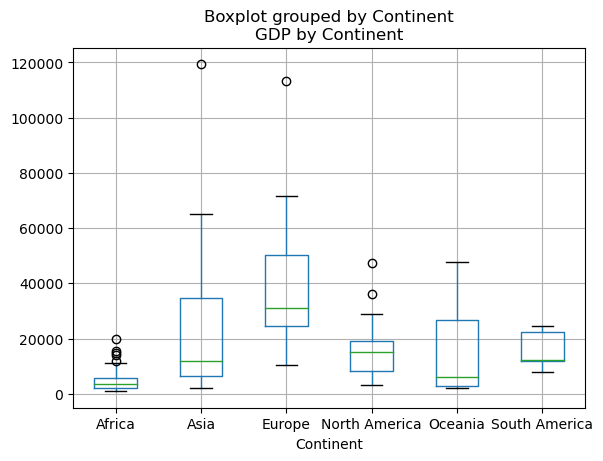

In [122]:
data.boxplot('GDP', by='Continent')
plt.title("GDP by Continent")

In [123]:
import plotly.figure_factory as ff
data.dropna(inplace = True)#droping nan values
data.GDP = [float(each.replace(',','.')) for each in data.GDP]#transforming data from string to float
data.Population = [float(each.replace(',','.')) for each in data.Population]
data.DailyCalory = [float(each.replace(',','.')) for each in data.DailyCalory]

data["index"] = np.arange(1,len(data)+1)#rearrange index
fig = ff.create_scatterplotmatrix(data, diag='box', index='index',colormap='Portland',
                                  colormap_type='cat',
                                  height=800, width=800)
iplot(fig)

AttributeError: 'float' object has no attribute 'replace'

In [124]:
#df_anova = pd.read_csv('PlantGrowth.csv')
data = data[['GDP','DailyCalory']]

Cntrs = pd.unique(data.GDP.values)
data1 = {Ctry:data['GDP'][data.GDP == Ctry] for Ctry in Cntrs}
 
F, p = stats.f_oneway(data1['Ireland'], data1['Spain'], data1['Belgium'])


print("p-value for significance is: ", p)


if p<0.05:
    print("REJECTING THE NULL HYPOTHESIS")
else:
    print("ACCEPTING THE NULL HYPOTHESIS")

KeyError: 'Ireland'

In [125]:
#Reimporting the joint dataset
data = pd.merge(gf, cs, on=["Country", "Year", "Population"], how="left" ) #Merging two datasets gf and cs

In [126]:
#Dropping all rows with NaN data
data.dropna(inplace=True) 

In [127]:
data.loc[data['Continent'] == 'Europe'].groupby(['Country'])['Population'].sum()

Country
Albania                    2882482
Austria                    8642422
Belarus                    9700609
Belgium                   11248306
Bosnia and Herzegovina     3524328
Bulgaria                   7309255
Croatia                    4254821
Cyprus                     1187286
Czechia                   10523801
Denmark                    5677795
Estonia                    1314658
Finland                    5479457
Greece                    10806644
Hungary                    9844250
Iceland                     331068
Ireland                    4665764
Italy                     60232908
Latvia                     1991951
Lithuania                  2963764
Luxembourg                  569415
Malta                       456585
Moldova                    3277390
Montenegro                  633969
Netherlands               17041110
North Macedonia            2107965
Norway                     5190357
Poland                    38553148
Portugal                  10365436
Romania     

In [128]:
data.head()

,Country,Year,Population,Code,DailyCalory,GDP,Continent
54,Afghanistan,2015,33753500,AFG,2044.0,2068.265869,Asia
231,Albania,2015,2882482,ALB,3280.0,11878.454102,Europe
290,Algeria,2015,39543148,DZA,3379.0,11696.950195,Africa
408,Angola,2015,28127724,AGO,2380.0,8036.411133,Africa
467,Antigua and Barbuda,2015,89958,ATG,2405.0,18594.544922,North America


In [129]:
data.dropna(inplace=True) #Dropping all rows with NaN data

In [130]:
data.head()

,Country,Year,Population,Code,DailyCalory,GDP,Continent
54,Afghanistan,2015,33753500,AFG,2044.0,2068.265869,Asia
231,Albania,2015,2882482,ALB,3280.0,11878.454102,Europe
290,Algeria,2015,39543148,DZA,3379.0,11696.950195,Africa
408,Angola,2015,28127724,AGO,2380.0,8036.411133,Africa
467,Antigua and Barbuda,2015,89958,ATG,2405.0,18594.544922,North America


In [131]:
stats.f_oneway(data['GDP'][data['Population'] == '4665764'],
               data['GDP'][data['Population'] == '46431344'],
               data['GDP'][data['Population'] == '11248306'])

/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:3621: F_onewayBadInputSizesWarning:

at least one input has length 0



F_onewayResult(statistic=nan, pvalue=nan)

In [132]:
print(data.shape[0])

148


In [133]:
data[(data.Country.isin(['Portugal', 'Spain', 'Ireland'])) & (data.Population > 40000)]

,Country,Year,Population,Code,DailyCalory,GDP,Continent
5240,Ireland,2015,4665764,IRL,3717.0,71508.734375,Europe
9022,Portugal,2015,10365436,PRT,3437.0,31118.791016,Europe
10382,Spain,2015,46431344,ESP,3195.0,37377.066406,Europe


In [134]:
data.head

<bound method NDFrame.head of                    Country  Year  Population Code  DailyCalory           GDP  \
54             Afghanistan  2015    33753500  AFG       2044.0   2068.265869   
231                Albania  2015     2882482  ALB       3280.0  11878.454102   
290                Algeria  2015    39543148  DZA       3379.0  11696.950195   
408                 Angola  2015    28127724  AGO       2380.0   8036.411133   
467    Antigua and Barbuda  2015       89958  ATG       2405.0  18594.544922   
...                    ...   ...         ...  ...          ...           ...   
11654           Uzbekistan  2015    30949416  UZB       2985.0   6401.115234   
11713              Vanuatu  2015      276450  VUT       2699.0   2915.700439   
11831              Vietnam  2015    92191400  VNM       2900.0   6438.259766   
12216               Zambia  2015    16248231  ZMB       2029.0   3443.553223   
12275             Zimbabwe  2015    14154937  ZWE       1912.0   3707.622559   

         

##### Chi Test

In [135]:
contigency=pd.crosstab(index=data['Country'], columns=data['GDP'] >3000)

<AxesSubplot:xlabel='GDP', ylabel='Country'>

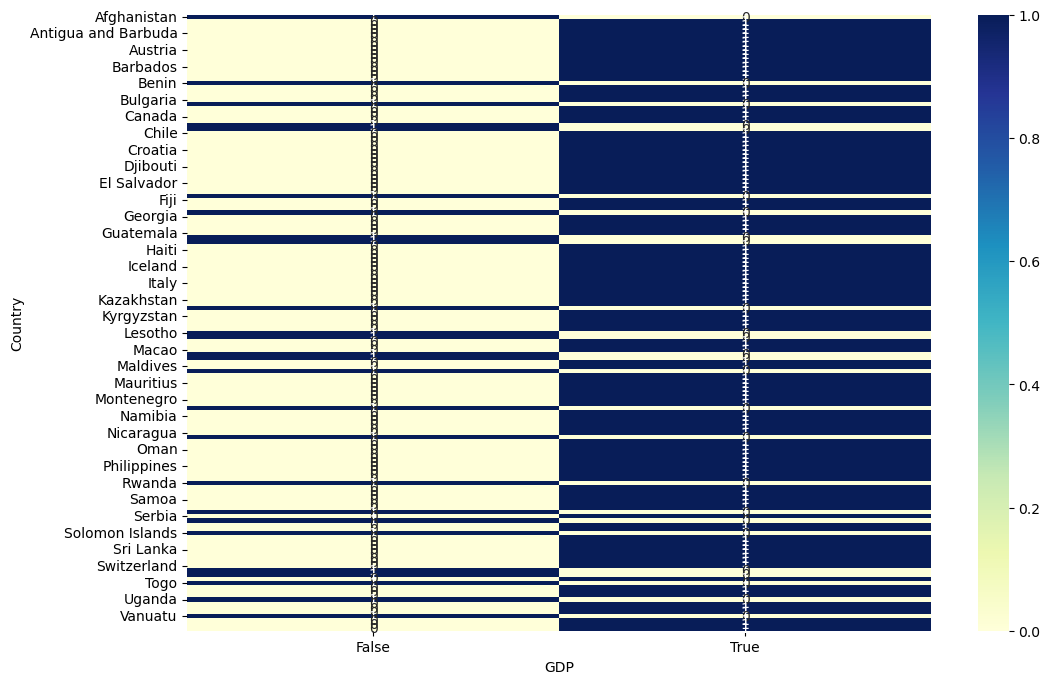

In [136]:
plt.figure(figsize=(12,8))
sns.heatmap(contigency, annot=True, cmap="YlGnBu")

In [137]:
# Chi-square test of independence. 
c, p, dof, expected = chi2_contingency(contigency) 
# Print the p-value
print(p)

0.46133899992604666


In [138]:
#Country={"Ireland", "Spain", "Belgium"}

In [139]:
print("data")

data


In [140]:
#df1 = data[data['Year']==2015]
#df2 = pd.crosstab(df1['GDP'], df1['Country'])

In [141]:
pd.crosstab(data.GDP, data.Country)

Country,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,...,Tunisia,Turkmenistan,Uganda,United Arab Emirates,Uruguay,Uzbekistan,Vanuatu,Vietnam,Zambia,Zimbabwe
GDP,,,,,,,,,,,,,,,,,,,,,
852.749207,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1131.519165,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1262.613159,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1457.503662,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1543.712036,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65267.414062,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
68025.921875,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71508.734375,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:xlabel='GDP', ylabel='Country'>

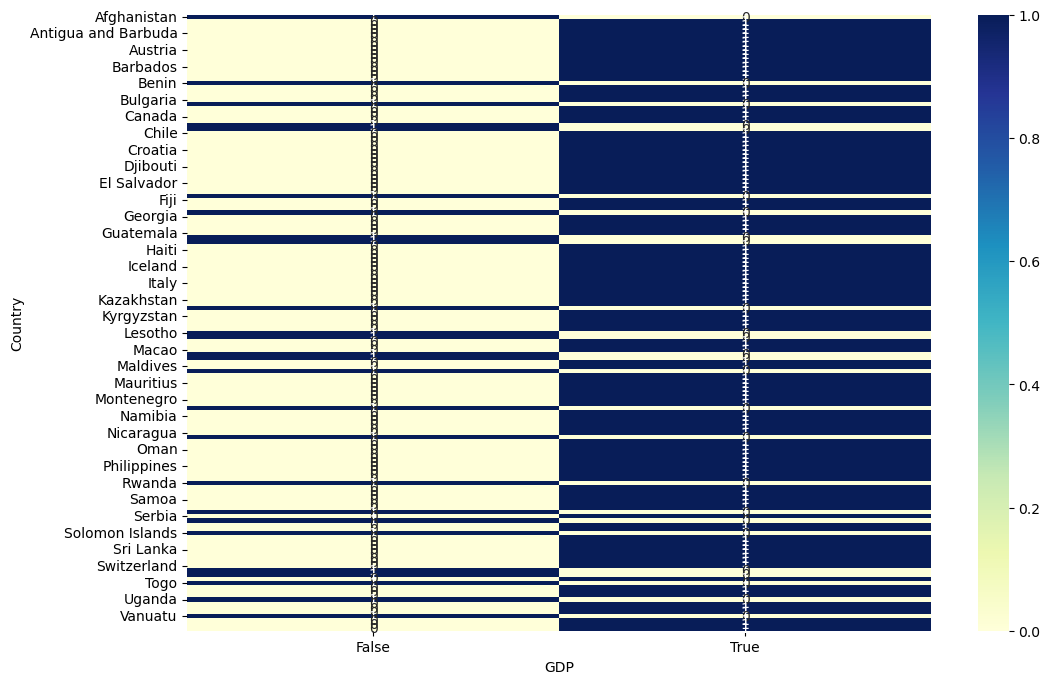

In [142]:
plt.figure(figsize=(12,8))
sns.heatmap(contigency, annot=True, cmap="YlGnBu")

##### Grid Search

In [716]:
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
np.random.seed(0)

In [717]:
data.head()

,Country,Year,Population,Code,DailyCalory,GDP,Continent
54,Afghanistan,2015,33753500,AFG,2044.0,2068.265869,Asia
231,Albania,2015,2882482,ALB,3280.0,11878.454102,Europe
290,Algeria,2015,39543148,DZA,3379.0,11696.950195,Africa
408,Angola,2015,28127724,AGO,2380.0,8036.411133,Africa
467,Antigua and Barbuda,2015,89958,ATG,2405.0,18594.544922,North America


In [722]:
X = data.Continent
y = data.GDP

In [723]:
pipe = Pipeline([("classifier", RandomForestClassifier())])
search_space = [{"classifier": [LogisticRegression()],
                     "classifier__penalty": ["l1", "l2"],
                     "classifier__C": np.logspace(4, 4, 10)},
                    {"classifier": [RandomForestClassifier()],
                     "classifier__n_estimators": [10, 100, 1000],
                     "classifier__max_features": [1, 2, 3]}]

In [724]:
clf = GridSearchCV(pipe, search_space, cv=2, verbose=0, n_jobs = 10)
data = clf.fit(X, y)


/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


58 fits failed out of a total of 58.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty,

ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

In [725]:
print(data.best_estimator_.get_params()["classifier"])

AttributeError: 'DataFrame' object has no attribute 'best_estimator_'

##### Cross Validation

In [782]:
data.head()

,Country,Year,Population,Code,DailyCalory,GDP,Continent
54,Afghanistan,2015,33753500,AFG,2044.0,2068.265869,Asia
231,Albania,2015,2882482,ALB,3280.0,11878.454102,Europe
290,Algeria,2015,39543148,DZA,3379.0,11696.950195,Africa
408,Angola,2015,28127724,AGO,2380.0,8036.411133,Africa
467,Antigua and Barbuda,2015,89958,ATG,2405.0,18594.544922,North America


In [783]:
y = data['GDP'].values
X = data['Year'].values

In [784]:
data[data["Country"] == "Ireland"] 

,Country,Year,Population,Code,DailyCalory,GDP,Continent
5240,Ireland,2015,4665764,IRL,3717.0,71508.734375,Europe


In [785]:
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X.shape))

# Reshape X and y
y = y.reshape(-1, 1)
X = X.reshape(-1, 1)

# Print the dimensions of X and y after reshaping
print("Dimensions of y after reshaping: {}".format(y.shape))
print("Dimensions of X after reshaping: {}".format(X.shape))

Dimensions of y before reshaping: (148,)
Dimensions of X before reshaping: (148,)
Dimensions of y after reshaping: (148, 1)
Dimensions of X after reshaping: (148, 1)


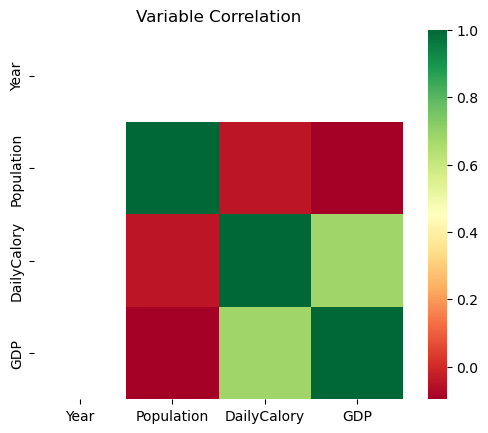

In [786]:
sns.heatmap(data.corr(), square=True, cmap='RdYlGn')
plt.title("Variable Correlation")
plt.figsize=(12,8)

In [787]:
data.describe()

,Year,Population,DailyCalory,GDP
count,148.0,1.480000e+02,148.000000,148.000000
mean,2015.0,1.655570e+07,2826.412162,19274.031900
std,0.0,2.527440e+07,439.657085,20390.829317
min,2015.0,4.781400e+04,1729.000000,852.749207
25%,2015.0,2.219486e+06,2508.750000,4331.738281
50%,2015.0,7.436538e+06,2780.500000,11934.864258
75%,2015.0,1.901504e+07,3183.000000,27912.890625
max,2015.0,1.578300e+08,3804.000000,119406.921875


In [788]:
data.info

<bound method DataFrame.info of                    Country  Year  Population Code  DailyCalory           GDP  \
54             Afghanistan  2015    33753500  AFG       2044.0   2068.265869   
231                Albania  2015     2882482  ALB       3280.0  11878.454102   
290                Algeria  2015    39543148  DZA       3379.0  11696.950195   
408                 Angola  2015    28127724  AGO       2380.0   8036.411133   
467    Antigua and Barbuda  2015       89958  ATG       2405.0  18594.544922   
...                    ...   ...         ...  ...          ...           ...   
11654           Uzbekistan  2015    30949416  UZB       2985.0   6401.115234   
11713              Vanuatu  2015      276450  VUT       2699.0   2915.700439   
11831              Vietnam  2015    92191400  VNM       2900.0   6438.259766   
12216               Zambia  2015    16248231  ZMB       2029.0   3443.553223   
12275             Zimbabwe  2015    14154937  ZWE       1912.0   3707.622559   

       

In [789]:
X_population = data['Population'].values.reshape(-1, 1)
y = data['GDP'].values.reshape(-1, 1)

Text(0.5, 1.0, 'GDP vs Population')

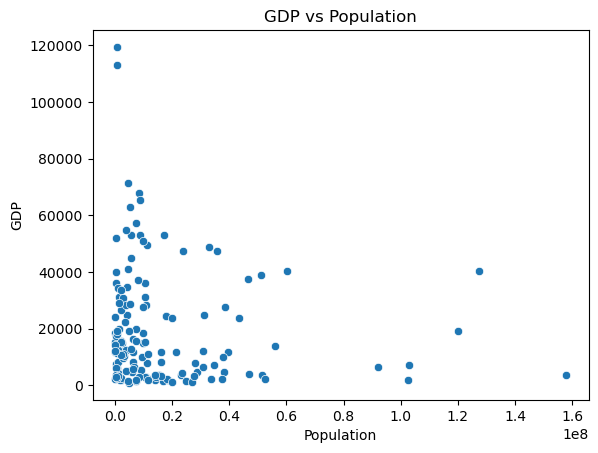

In [790]:
sns.scatterplot(x='Population', y='GDP', data=data)
plt.title("GDP vs Population")

In [791]:
from sklearn.linear_model import LinearRegression

0.009318318766821432


Text(0.5, 1.0, 'GDP vs Population')

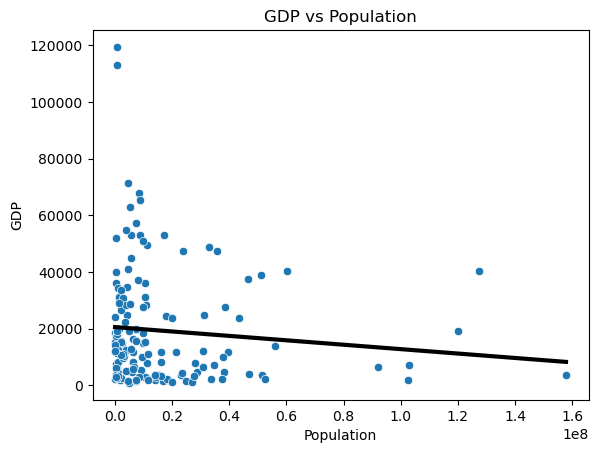

In [792]:
# Create the regressor: reg
reg = LinearRegression()

# Create th prediction space
prediction_space = np.linspace(min(X_population), max(X_population)).reshape(-1, 1)

# Fit the model to the data
reg.fit(X_population, y)

# compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print $R^2$
print(reg.score(X_population, y))

# Plot regression line on scatter plot
sns.scatterplot(x='Population', y='GDP', data=data)
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.title("GDP vs Population")

##### Train/Test Split for Regression

In [793]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: -0.30760283577383274
Root Mean Squared Error: 16579.379938350026


##### Cross Validation (SkiKit-Learn)

In [794]:
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X, y, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[-0.06294748 -0.02813514 -0.10455824 -0.00491871 -0.01425203]
Average 5-Fold CV Score: -0.04296231994760693


In [795]:
data.ndim #Number of dimensions

2

In [796]:
data['GDP'].astype(str)

54       2068.265869140625
231       11878.4541015625
290       11696.9501953125
408        8036.4111328125
467        18594.544921875
               ...        
11654       6401.115234375
11713    2915.700439453125
11831       6438.259765625
12216     3443.55322265625
12275     3707.62255859375
Name: GDP, Length: 148, dtype: object

In [797]:
data[data["Country"] == "Ireland"] 

,Country,Year,Population,Code,DailyCalory,GDP,Continent
5240,Ireland,2015,4665764,IRL,3717.0,71508.734375,Europe


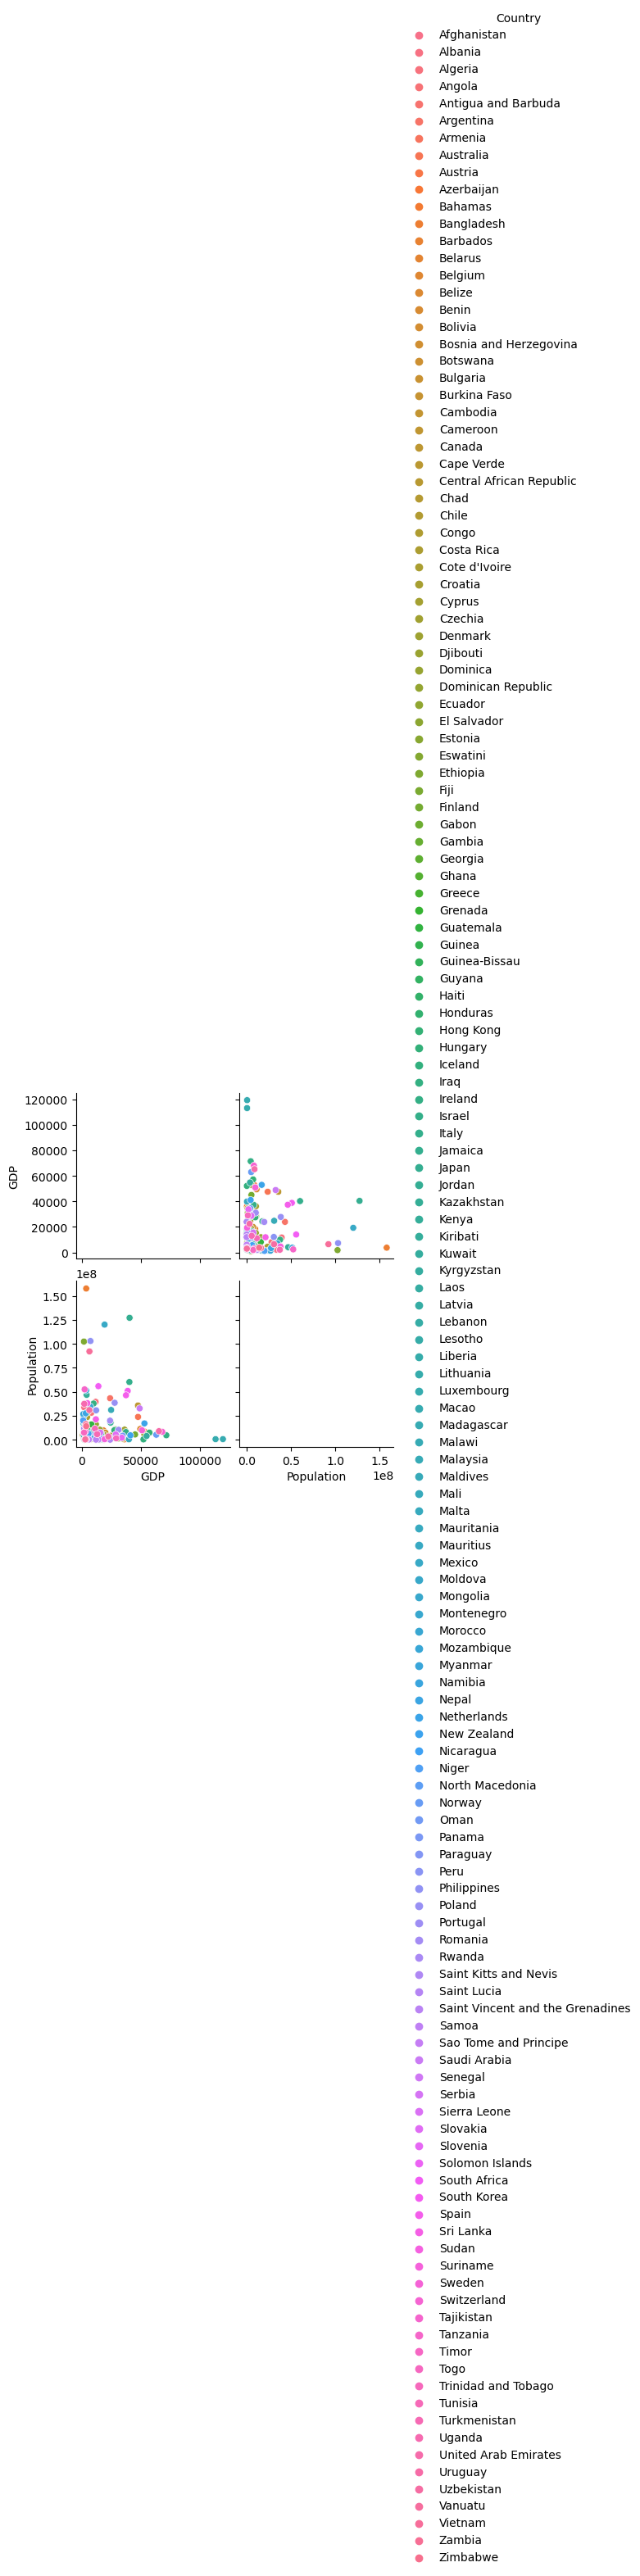

In [798]:
sns.pairplot(data, vars=['GDP', 'Population'], hue='Country')
plt.show()

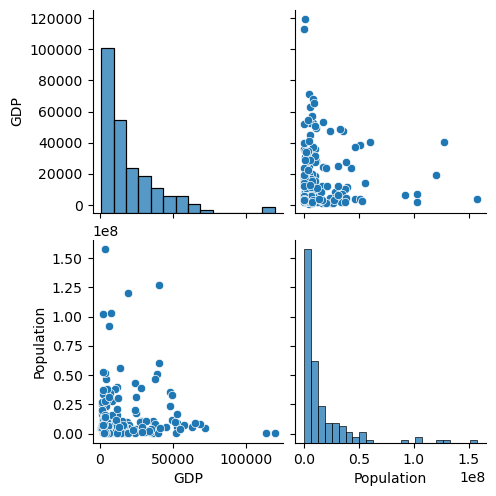

In [799]:
sns.pairplot(data, vars=['GDP', 'Population'])
plt.show()

##### ANN

In [800]:
data.head()

,Country,Year,Population,Code,DailyCalory,GDP,Continent
54,Afghanistan,2015,33753500,AFG,2044.0,2068.265869,Asia
231,Albania,2015,2882482,ALB,3280.0,11878.454102,Europe
290,Algeria,2015,39543148,DZA,3379.0,11696.950195,Africa
408,Angola,2015,28127724,AGO,2380.0,8036.411133,Africa
467,Antigua and Barbuda,2015,89958,ATG,2405.0,18594.544922,North America


In [801]:
data.drop(columns=['Country', 'Code', 'Continent'], axis=1, inplace=True)

In [802]:
data.head()

,Year,Population,DailyCalory,GDP
54,2015,33753500,2044.0,2068.265869
231,2015,2882482,3280.0,11878.454102
290,2015,39543148,3379.0,11696.950195
408,2015,28127724,2380.0,8036.411133
467,2015,89958,2405.0,18594.544922


In [803]:
data.dtypes

Year             int64
Population       int64
DailyCalory    float64
GDP            float64
dtype: object

In [804]:
# converting 'Weight' from float to int
data['DailyCalory'] = data['DailyCalory'].astype(int)
data['GDP'] = data['GDP'].astype(int)

In [805]:
data.dtypes

Year           int64
Population     int64
DailyCalory    int64
GDP            int64
dtype: object

In [806]:
data.head()

,Year,Population,DailyCalory,GDP
54,2015,33753500,2044,2068
231,2015,2882482,3280,11878
290,2015,39543148,3379,11696
408,2015,28127724,2380,8036
467,2015,89958,2405,18594


In [807]:
import tensorflow as tf
from keras.models import Sequential
import pandas as pd
from keras.layers import Dense
#url = 'https://raw.githubusercontent.com/werowe/logisticRegressionBestModel/master/KidCreative.csv'
#data = pd.read_csv(url, delimiter=',')
labels=data['Year']
features = data.iloc[:, 1:3]

In [808]:
import numpy as np
from sklearn.model_selection import train_test_split

X=features
y=np.ravel(labels)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [809]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
lb=LabelEncoder()
y=lb.fit_transform(y)

In [810]:
model = Sequential()
model.add(Dense(8, activation='relu', input_shape = (2,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
optimizer='sgd',
metrics=['accuracy'])
model.fit(X_train,
          y_train,
          epochs=3,
          batch_size=5,
          verbose=2,
          validation_data = (X_test, y_test))

Epoch 1/3
21/21 - 1s - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00 - 546ms/epoch - 26ms/step
Epoch 2/3
21/21 - 0s - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00 - 49ms/epoch - 2ms/step
Epoch 3/3
21/21 - 0s - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00 - 68ms/epoch - 3ms/step


In [811]:
data=data.dropna()

In [812]:
y_pred = model.predict(X_test)
Growth = model.evaluate(X_test, y_test, verbose=2)
print(Growth)

2/2 [==============================] - 0s 7ms/step
2/2 - 0s - loss: nan - accuracy: 0.0000e+00 - 172ms/epoch - 86ms/step
[nan, 0.0]


In [813]:
Growth = model.evaluate(X_train, y_train)
print("Training Accuracy: %.2f%%\n" % (Growth[1] * 100))

scores = model.evaluate(X_test, y_test)
print("Testing Accuracy: %.2f%%\n" % (Growth[1] * 100))

4/4 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.0000e+00
Training Accuracy: 0.00%

2/2 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.0000e+00
Testing Accuracy: 0.00%



## REFERENCES:

1. https://datagy.io/python-z-score/



2. https://www.projectpro.io/recipes/perform-t-test-python



3. https://goodboychan.github.io/python/datacamp/machine_learning/2020/05/29/03-Regression.html



4. https://www.bmc.com/blogs/deep-learning-neural-network-tutorial-keras/



5. https://prtkm.github.io/FRB-python-gapminder/08-data-frames/



6. https://www.projectpro.io/recipes/select-model-using-grid-search-in-python



7. https://www.kaggle.com/code/metetik/data-visualization-of-countries-dataset/notebook